In [7]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [8]:
def read_data(file_name):
    with open(file_name, mode='rb') as file: # b is important -> binary
        fileContent = file.read()
        rows = int(math.sqrt(len(fileContent))) 
        overrides = np.zeros((rows, rows))
        for idx in range(0, rows**2):
            i = idx // rows 
            j = idx % rows
            
            overrides[i, j] = fileContent[i*rows + j]
    return overrides

def process_data(overrides):
    overrides_values = {}
    for i in range(len(overrides)):
        for j in range(len(overrides[i])):
            value = overrides[i][j]
            if value not in overrides_values.keys():
                overrides_values[value] = 1
            else:
                overrides_values[value] += 1
    return overrides_values

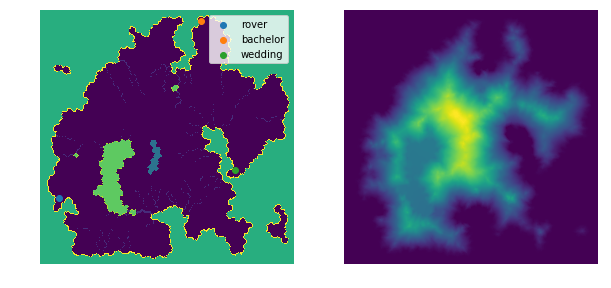

In [28]:
overrides = read_data("../assets/overrides.data")
elevation = read_data("../assets/elevation.data")

rover = (159, 1520)
bachelor = (1303, 85)
wedding = (1577, 1294)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1.imshow(overrides)
ax2.imshow(elevation)
ax1.axis('off')
ax2.axis('off')

ax1.scatter(rover[0], rover[1], label='rover')
ax1.scatter(bachelor[0], bachelor[1], label='bachelor')
ax1.scatter(wedding[0], wedding[1], label='wedding')
ax1.legend()

plt.show()

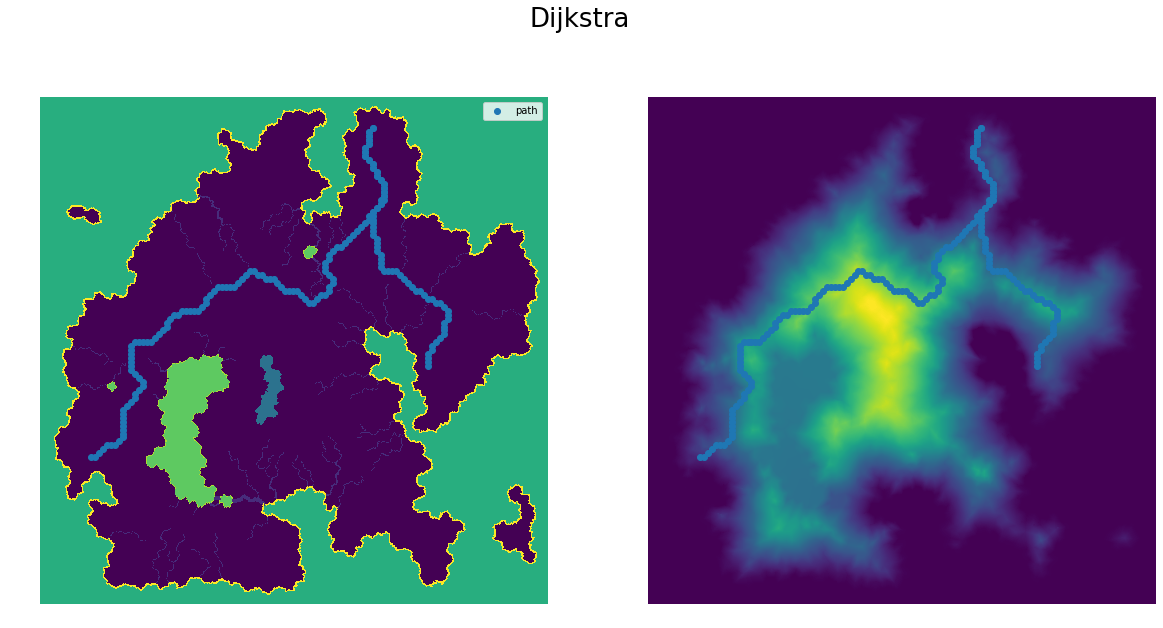

In [54]:
result_file_name = "../results/dijkstra_path.txt"
path = np.loadtxt(result_file_name)

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Dijkstra', fontsize=26)

ax3.imshow(overrides)
ax4.imshow(elevation)

ax3.scatter(path[:, 0], path[:, 1], label='path')
ax4.scatter(path[:, 0], path[:, 1], label='path')
ax3.legend()

ax3.axis('off')
ax4.axis('off')

plt.show()
        

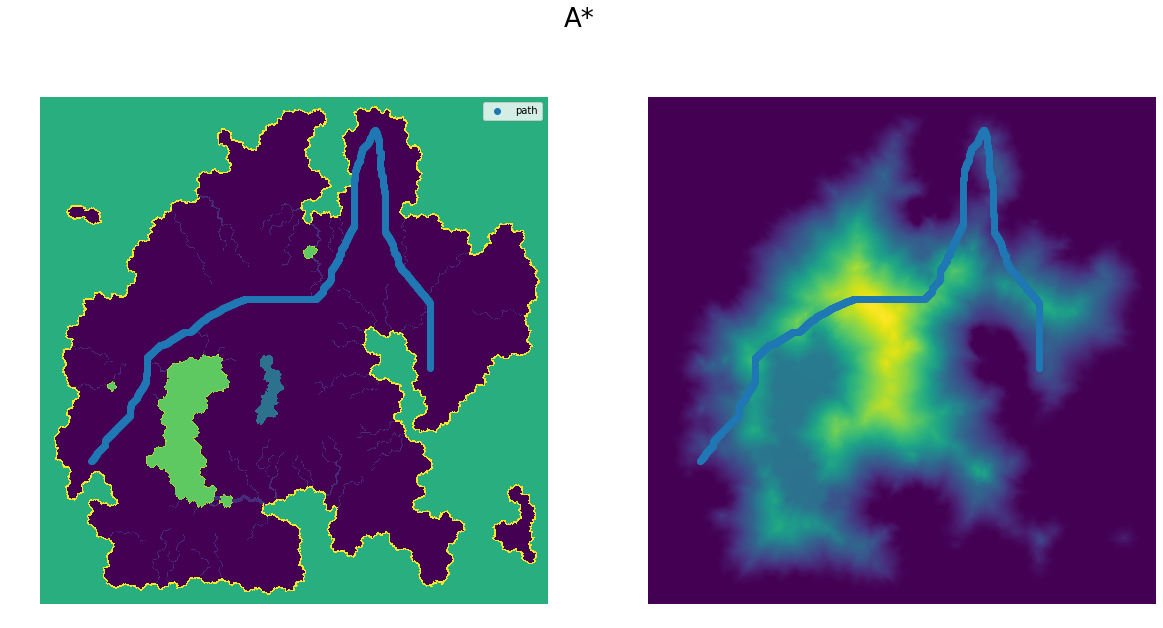

In [63]:
result_file_name = "../results/a_star_path.txt"
path = np.loadtxt(result_file_name)

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('A*', fontsize=26)

ax3.imshow(overrides)
ax4.imshow(elevation)

ax3.scatter(path[:, 0], path[:, 1], label='path')
ax4.scatter(path[:, 0], path[:, 1], label='path')
ax3.legend()

ax3.axis('off')
ax4.axis('off')

plt.show()